<a href="https://colab.research.google.com/github/ThangDoan2001/TensorFlow_ZeroToHero/blob/master/03_introduction_to_commputer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Net works and Computer Vision with TensoFlow

Computer vision is the practive of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front. 

## Get the data
The images we're working with are form the Food1-1 dataset(101 different classes of food)

However we've modified it to only use two classes(pizza and steak)

**Note:** We start with a smaller datatset so we can experiment quickly and figure what works or better yet what doesn't work before scaling up. 

In [1]:
import zipfile


In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file 
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()


--2021-08-18 02:15:45--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.128, 142.250.141.128, 142.251.2.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   104MB/s    in 1.0s    

2021-08-18 02:15:47 (104 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data

And for a computer vision project.... It usually means visualizing many samples of your data

In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train

pizza  steak


In [5]:
import os 

# Walk through puiizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [6]:
# The extra file in our pizza_steak directory is ".DS_Store"
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Aug 18 02:15 .
drwxr-xr-x 1 root root 4096 Aug 18 02:15 ..
-rw-r--r-- 1 root root 6148 Aug 18 02:15 .DS_Store
drwxr-xr-x 4 root root 4096 Aug 18 02:15 test
drwxr-xr-x 4 root root 4096 Aug 18 02:15 train


In [7]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [8]:
# get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class_names from the subdirectory
class_names = class_names[1:] # Remove .DS_store
print(class_names)

['pizza' 'steak']


In [9]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class): 
  # Set up the target directory(we'll view images from here)
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # Show the shape of the image

  return img

['759873.jpg']
Image shape: (512, 512, 3)


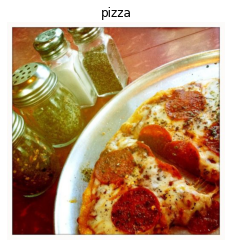

In [10]:
# View a random image from the trainig dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [11]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[255, 246, 251],
        [255, 247, 251],
        [255, 248, 251],
        ...,
        [251, 251, 249],
        [251, 251, 249],
        [251, 251, 249]],

       [[255, 247, 251],
        [255, 247, 251],
        [255, 249, 251],
        ...,
        [251, 251, 249],
        [251, 251, 249],
        [251, 251, 249]],

       [[255, 248, 251],
        [255, 249, 251],
        [252, 251, 249],
        ...,
        [252, 251, 249],
        [251, 251, 249],
        [251, 251, 249]],

       ...,

       [[251, 251, 249],
        [251, 251, 249],
        [252, 251, 249],
        ...,
        [252, 251, 247],
        [251, 251, 249],
        [251, 251, 249]],

       [[251, 251, 249],
        [251, 251, 249],
        [251, 251, 249],
        ...,
        [251, 251, 249],
        [251, 251, 249],
        [251, 251, 249]],

       [[251, 251, 249],
        [251, 251, 249],
        [251, 251, 249],
        ...,
        [251, 251, 24

In [12]:
# View the image shape
img.shape # returns width, height, colour channels

(512, 512, 3)

**Note:** As we've discuessed beffore , many machine learning models, including neural networks prefer the values they work with to be between 0 & 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value).


In [13]:
# get all the pixel values between 0 & 1
img/255.

array([[[1.        , 0.96470588, 0.98431373],
        [1.        , 0.96862745, 0.98431373],
        [1.        , 0.97254902, 0.98431373],
        ...,
        [0.98431373, 0.98431373, 0.97647059],
        [0.98431373, 0.98431373, 0.97647059],
        [0.98431373, 0.98431373, 0.97647059]],

       [[1.        , 0.96862745, 0.98431373],
        [1.        , 0.96862745, 0.98431373],
        [1.        , 0.97647059, 0.98431373],
        ...,
        [0.98431373, 0.98431373, 0.97647059],
        [0.98431373, 0.98431373, 0.97647059],
        [0.98431373, 0.98431373, 0.97647059]],

       [[1.        , 0.97254902, 0.98431373],
        [1.        , 0.97647059, 0.98431373],
        [0.98823529, 0.98431373, 0.97647059],
        ...,
        [0.98823529, 0.98431373, 0.97647059],
        [0.98431373, 0.98431373, 0.97647059],
        [0.98431373, 0.98431373, 0.97647059]],

       ...,

       [[0.98431373, 0.98431373, 0.97647059],
        [0.98431373, 0.98431373, 0.97647059],
        [0.98823529, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to ur training data

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data ( get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directory
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                            batch_size=32,
                                            target_size=(224, 224),
                                            class_mode="binary",
                                            seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


## Build a CNN model(same as the Tiny VGG on the CNN explainer website)

In [15]:
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, 
                         activation=tf.keras.activations.relu,
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation=tf.keras.activations.relu),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation=tf.keras.activations.relu),
  tf.keras.layers.Conv2D(10, 3, activation=tf.keras.activations.relu),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# Compile our CNN
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 42s 210ms/step - loss: 0.5198 - accuracy: 0.7380 - val_loss: 0.3857 - val_accuracy: 0.8400
Epoch 2/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4150 - accuracy: 0.8253 - val_loss: 0.3306 - val_accuracy: 0.8660
Epoch 3/5
47/47 [==============================] - 9s 187ms/step - loss: 0.3911 - accuracy: 0.8313 - val_loss: 0.3525 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3646 - accuracy: 0.8380 - val_loss: 0.3239 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 9s 185ms/step - loss: 0.3243 - accuracy: 0.8673 - val_loss: 0.3083 - val_accuracy: 0.8740


**Note:** If the above cell is taking longer than ~ 10 seconds per epoch, make sure you're using a GPU by going to 

Runtime -> Change Runtime Type -> Hardware Accelator  -> GPU(you may have to rerun some sells above)


In [17]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [18]:
# poloclub.github.io/cnn-explainer